In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as cat
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, levene

In [2]:
 df= pd.read_csv(r'bike_sharing.csv')

In [3]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [6]:
 df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [7]:
 df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<Axes: xlabel='season', ylabel='count'>

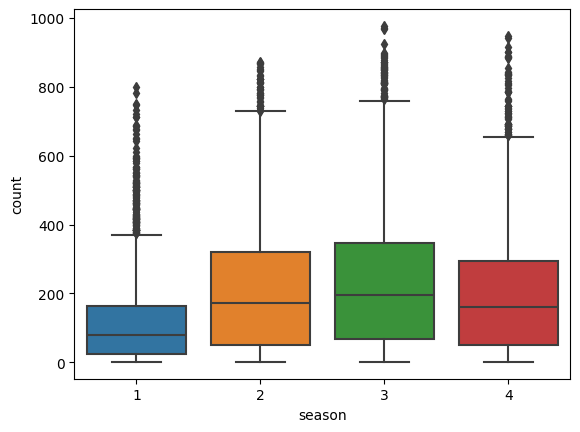

In [8]:
 cat.boxplot(y='count', x='season', data =df)

In [9]:
#iqr
q1=df['count'].quantile(0.25) 
q3=df['count'].quantile(0.75) 
iqr=q3-q1

In [10]:
df_copy=df[(df['count']>=q1-1.5*iqr) & (df['count']<=q3+1.5*iqr)]

<Axes: xlabel='season', ylabel='count'>

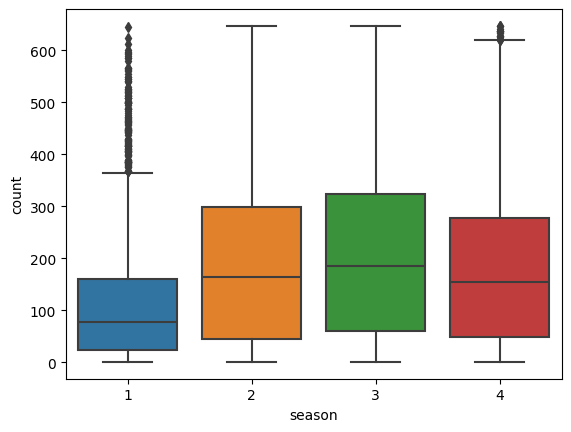

In [11]:
 cat.boxplot(y='count', x='season', data =df_copy)

<Axes: xlabel='workingday', ylabel='count'>

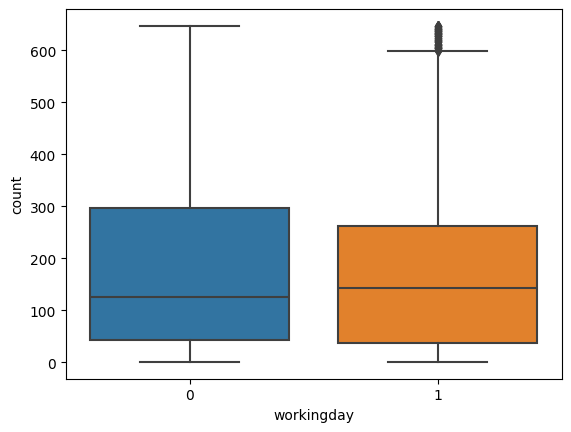

In [12]:
 cat.boxplot(y='count', x='workingday', data =df_copy)

In [13]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.

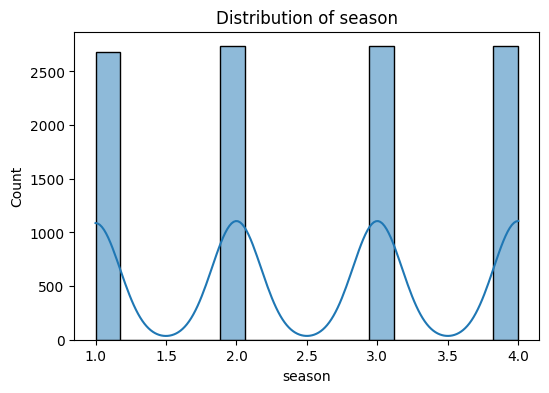

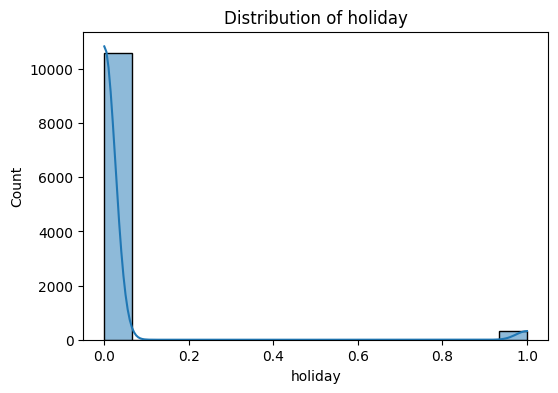

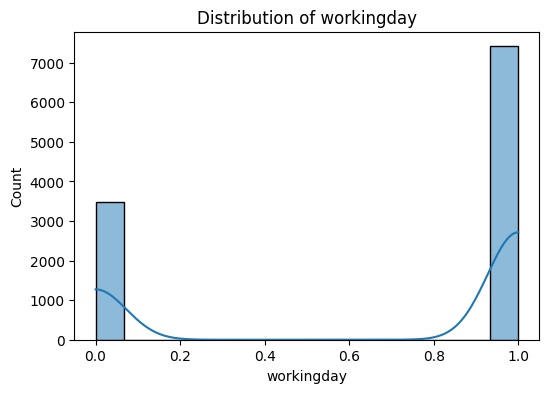

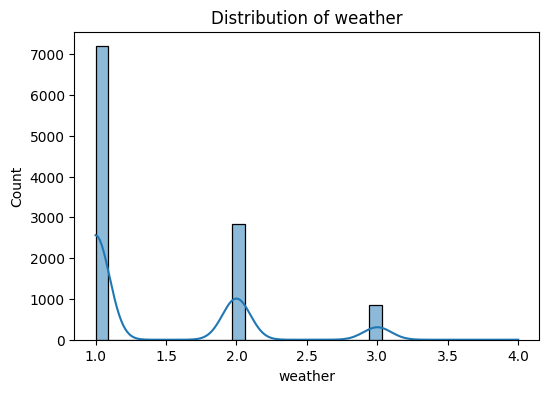

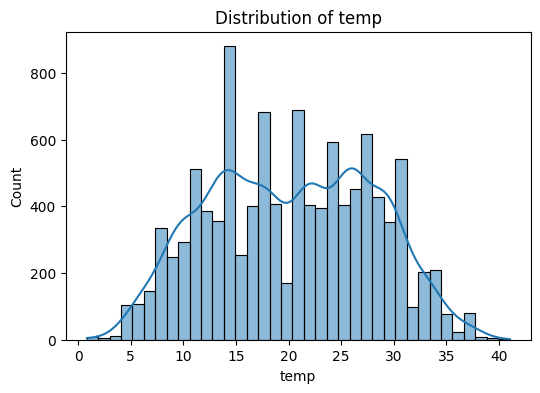

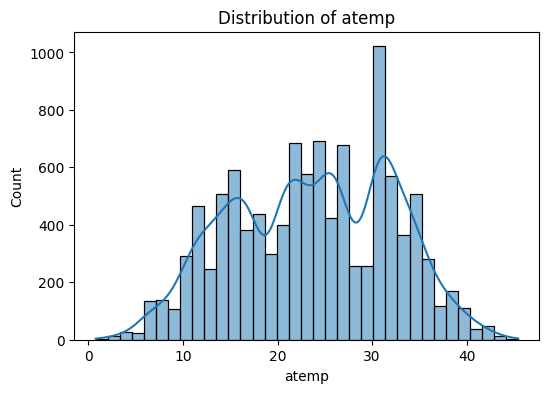

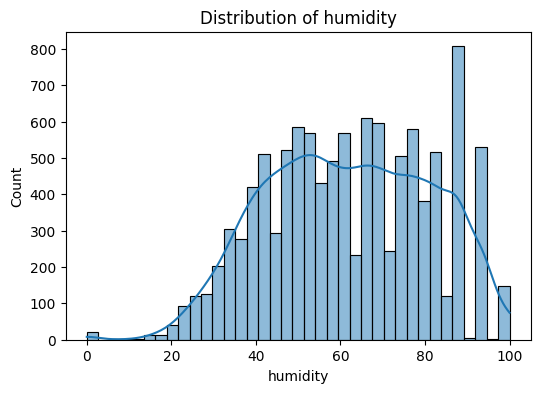

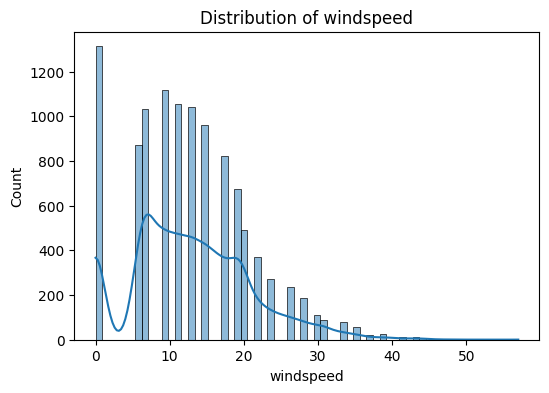

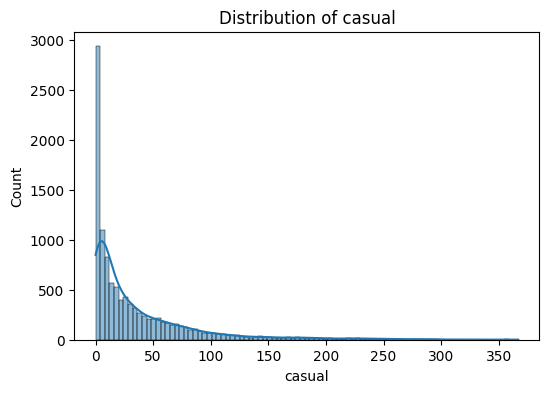

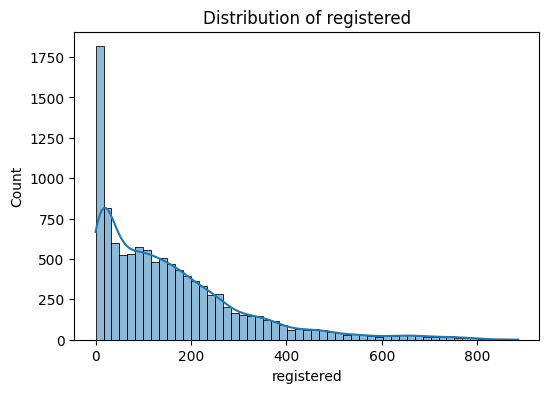

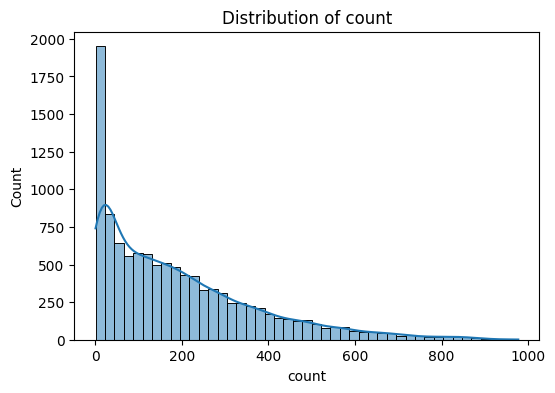

In [14]:
# Univariate Analysis
for column in df.columns:
    if df[column].dtype != 'object':
        plt.figure(figsize=(6,4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

/var/folders/jm/7r67wmqx3z15yqc7zh1sp04m0000gn/T/ipykernel_10015/1820807841.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


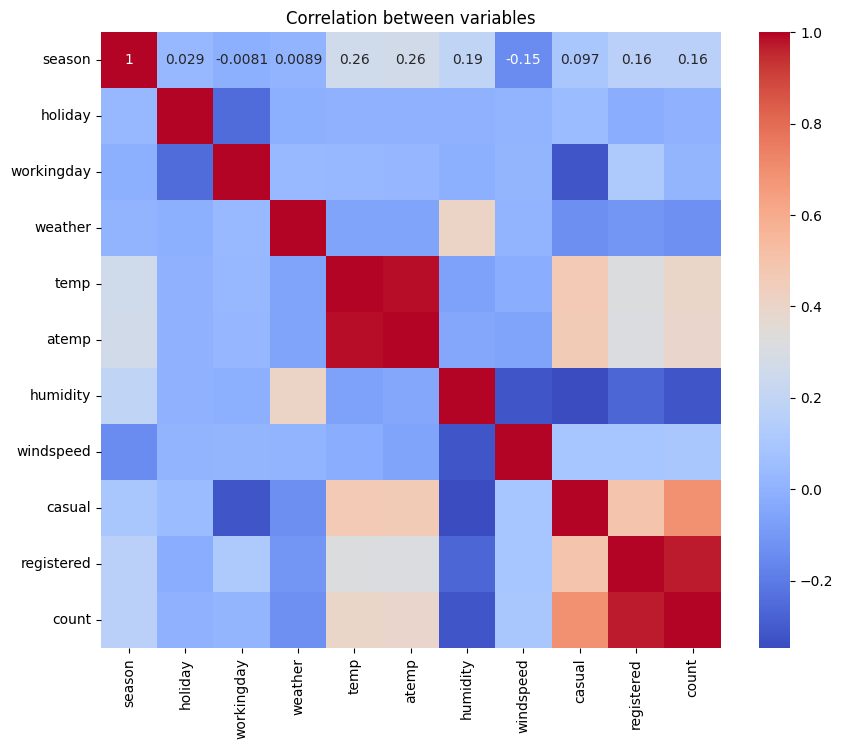

In [15]:
# Bivariate Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()

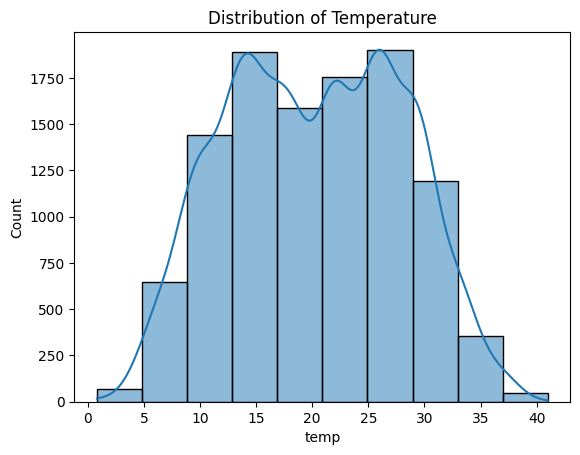

In [16]:
# Univariate Analysis - Distribution plots
sns.histplot(df['temp'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.show()


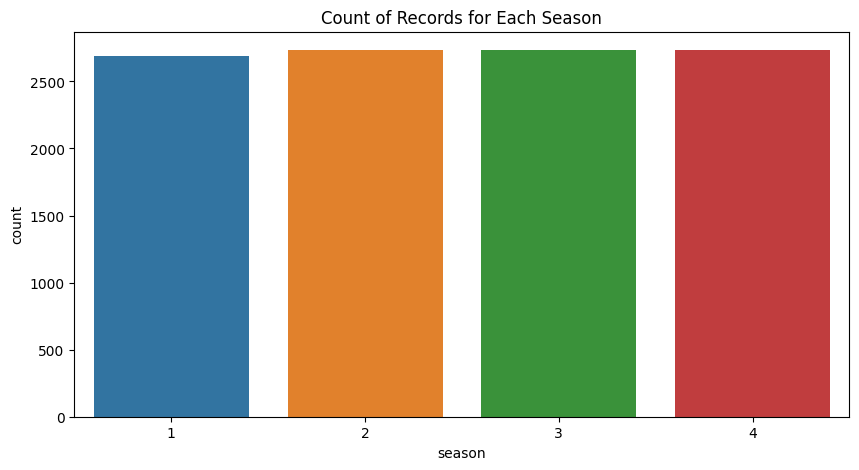

In [17]:
# Countplots for categorical variables
plt.figure(figsize=(10, 5))
sns.countplot(x='season', data=df)
plt.title('Count of Records for Each Season')
plt.show()

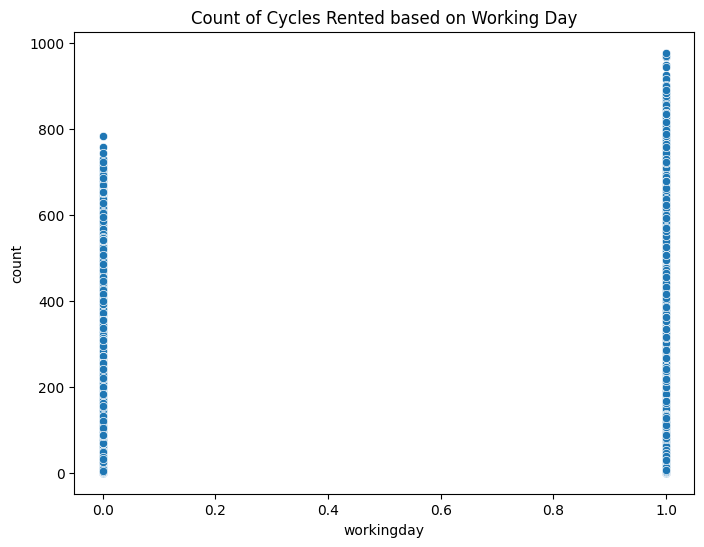

In [18]:
# Bivariate Analysis - Relationships between variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='workingday', y='count', data=df)
plt.title('Count of Cycles Rented based on Working Day')
plt.show()

In [19]:
# Check Equal Variance
# Null Hypothesis (H0): All input samples are from populations with equal variances.
# Alternate Hypothesis (H1): At least one pair of input samples are from populations with different variances.

stat, p = levene(df['temp'], df['atemp'], df['humidity'], df['windspeed'], df['casual'], df['registered'], df['count'])
print(f'p-value for Levene Test is {p}')
if p > 0.05:
    print('All input samples are from populations with equal variances.')
else:
    print('At least one pair of input samples are from populations with different variances.')

p-value for Levene Test is 0.0
At least one pair of input samples are from populations with different variances.


In [20]:

# 2-Sample T-Test
workingday = df[df['workingday'] == 1]['count']
non_workingday = df[df['workingday'] == 0]['count']
t_stat, p_val = stats.ttest_ind(workingday, non_workingday)
if p_val < 0.05:
    print("We reject the null hypothesis for the 2-sample T-test.")
else:
    print("We fail to reject the null hypothesis for the 2-sample T-test.")


We fail to reject the null hypothesis for the 2-sample T-test.


In [21]:

# ANOVA for weather conditions
weather_groups = df.groupby('weather')['count'].apply(list)
f_stat, p_val = stats.f_oneway(*weather_groups)
if p_val < 0.05:
    print("We reject the null hypothesis for the ANOVA (weather conditions).")
else:
    print("We fail to reject the null hypothesis for the ANOVA (weather conditions).")


We reject the null hypothesis for the ANOVA (weather conditions).


In [22]:

# ANOVA for seasons
season_groups = df.groupby('season')['count'].apply(list)
f_stat, p_val = stats.f_oneway(*season_groups)
if p_val < 0.05:
    print("We reject the null hypothesis for the ANOVA (seasons).")
else:
    print("We fail to reject the null hypothesis for the ANOVA (seasons).")


We reject the null hypothesis for the ANOVA (seasons).


In [23]:

# Chi-square test
contingency_table = pd.crosstab(df['season'], df['weather'])
chi2, p_val, _, _ = stats.chi2_contingency(contingency_table)
if p_val < 0.05:
    print("We reject the null hypothesis for the Chi-square test.")
else:
    print("We fail to reject the null hypothesis for the Chi-square test.")

We reject the null hypothesis for the Chi-square test.
